<a href="https://colab.research.google.com/github/Praise-Atadja/Data_preprocessing/blob/main/ml_pipeline_%5BPraise_Atadja%5D_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: [Early-Intervention Intelligence for Cognitive Development (Autism Prediction)]
## [EIICD]

## Student Name: [PRAISE ATADJA]

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)
   
   **Your answer for data sources goes here **
    
***Data Sources***:

Here is a concise summary of each data source, highlighting their critical contributions and potential impact on autism detection:

- **UC Irvine Machine Learning Repository (Autistic Spectrum Disorder Screening Data for Children)**:

This dataset contains information about individuals, including their scores on various screening questions for Autism Spectrum Disorder (ASD), demographic details such as age, gender, and ethnicity, as well as other factors like whether they have previously used ASD screening apps or if they have a family history of autism. Each individual is classified as either having ASD or not based on the screening results. [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/419/autistic+spectrum+disorder+screening+data+for+children)


- **UC Irvine Machine Learning Repository (Autistic Spectrum Disorder Screening Data for Adults)**:

This dataset contains information about adults and their scores on various screening questions for Autism Spectrum Disorder (ASD), along with demographic details such as age, gender, and ethnicity. It aims to facilitate the analysis of influential autistic traits and improve the classification of ASD cases. There are 704 instances and 21 attributes in the dataset, which includes missing values, and it is suitable for classification tasks in the medical, health, and social science domains. [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/426/autism+screening+adult)

 - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **Your answer for data agggregation goes here **

***Necessity for Data Aggregation***

In reference to the provided data sources:

Data aggregation from multiple sources is necessary for comprehensive analysis as it allows for a broader coverage across different age groups (children and adults), enhances the sample size for statistical significance, validates findings through cross-verification, and addresses potential data gaps or biases present in individual datasets.
   



In [93]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats
from scipy.stats.mstats import winsorize
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Your answer for data transformation goes here **

***Current Format of the Data:***

The current format of the data varies slightly across the three datasets: toddlers, children, and adults. For toddlers, the age is recorded in months, while for children and adults, the age is recorded in years. Each dataset consists of multiple instances (cases) where each instance represents an individual, and each instance contains several attributes/features related to autism screening, such as behavioral responses, demographic information, and diagnostic outcomes. The attributes include categorical, binary, and continuous variables, and the datasets are intended for classification tasks in the medical, health, and social science domains.

***Outline of Planned Transformation to Unified Format:***

To achieve a unified format suitable for analysis and modeling, the following steps will be taken:

- Ensure that each dataset has the same set of features with consistent naming conventions.
- Standardize categorical variables if necessary.
- Convert age variables to a consistent format (e.g., years) across all datasets.
- Address missing values and inconsistencies in the data.
- Merge the datasets into a single dataset, ensuring compatibility of features and target variables.

3. **Data Exploration:**
   - Enumerate the features included in the dataset.

***The features in the combined dataset include:***

- ID: A unique identifier for each individual in the dataset.
- A1-A10 Scores: Scores on 10 different questions or items used for screening ASD.
- Age: Age of the individual, either in months for toddlers or in years for children and adults.
- Gender: Gender of the individual.
- Ethnicity: Ethnicity or racial background of the individual.
- Jaundice: Indicates whether the individual had jaundice.
- Family Member with ASD: Indicates whether there is a family member diagnosed with ASD.
- Who Completed the Test: Specifies who completed the screening test for the individual.
- Result: Result of the ASD screening, indicating the presence or absence of ASD.
- Age Description: Description of the age range the individual falls into.
- Relation: Relation of the individual who completed the test to the individual being screened.
- Class/ASD: Target variable indicating the presence or absence of ASD.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   Data Exploration:




   
  **Insert code for data exploration below**

In [6]:
#load data
df_children =df_children = pd.read_csv('/content/drive/MyDrive/Autism-Child-Data.csv')
df_adults = df_children = pd.read_csv('/content/drive/MyDrive/Autism-Adult-Data.csv')

In [7]:
# Data Overview
print("\nChildren Data Overview:")
print(df_children.info())
print("\nSummary Statistics:")
print(df_children.describe())

print("\nAdults Data Overview:")
print(df_adults.info())
print("\nSummary Statistics:")
print(df_adults.describe())



Children Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               704 non-null    int64 
 1   A1_Score         704 non-null    int64 
 2   A2_Score         704 non-null    int64 
 3   A3_Score         704 non-null    int64 
 4   A4_Score         704 non-null    int64 
 5   A5_Score         704 non-null    int64 
 6   A6_Score         704 non-null    int64 
 7   A7_Score         704 non-null    int64 
 8   A8_Score         704 non-null    int64 
 9   A9_Score         704 non-null    int64 
 10  A10_Score        704 non-null    int64 
 11  age              704 non-null    object
 12  gender           704 non-null    object
 13  ethnicity        704 non-null    object
 14  jundice          704 non-null    object
 15  austim           704 non-null    object
 16  contry_of_res    704 non-null    object
 17  used_app_b


Analysis for Children:


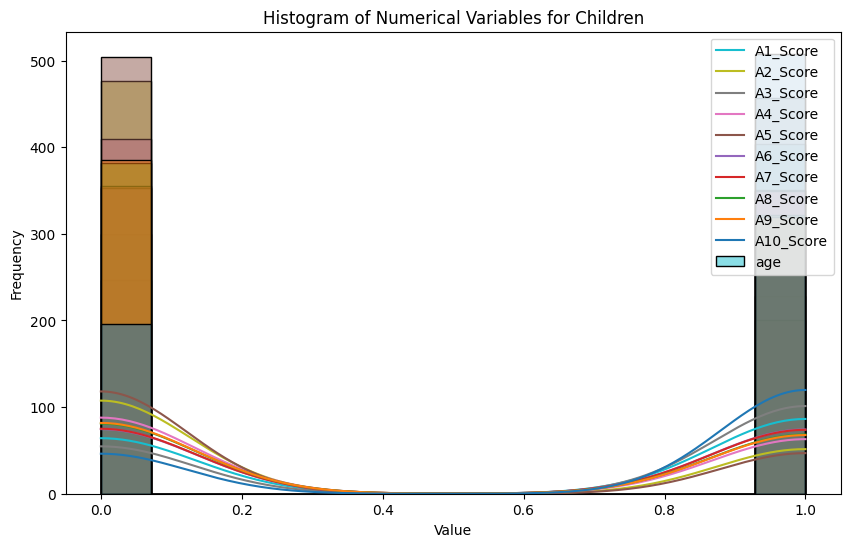


Analysis for Adults:


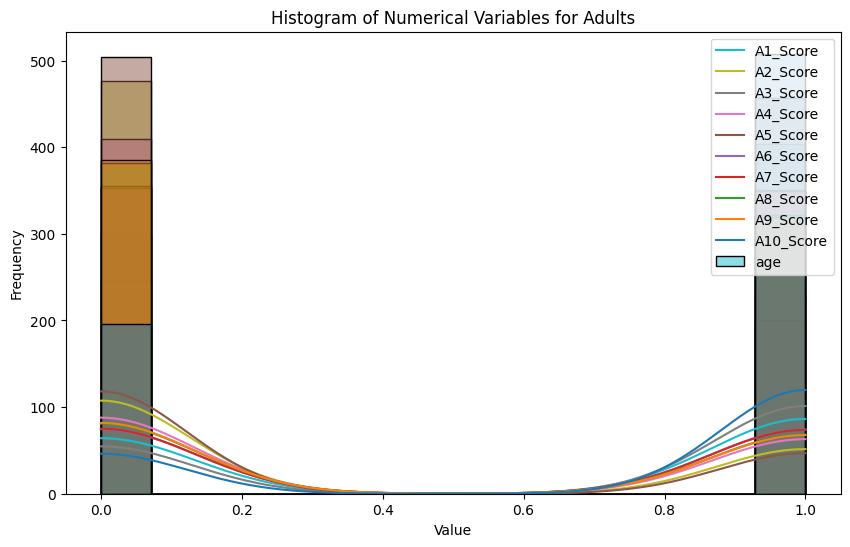

In [10]:
print("\nAnalysis for Children:")
plt.figure(figsize=(10, 6))
sns.histplot(data=df_children[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                               'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']], kde=True)
plt.title('Histogram of Numerical Variables for Children')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age'], loc='upper right')
plt.show()

print("\nAnalysis for Adults:")
plt.figure(figsize=(10, 6))
sns.histplot(data=df_adults[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                             'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']], kde=True)
plt.title('Histogram of Numerical Variables for Adults')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age'], loc='upper right')
plt.show()


<ipython-input-12-59d599ab7734>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_children = df_children.corr()


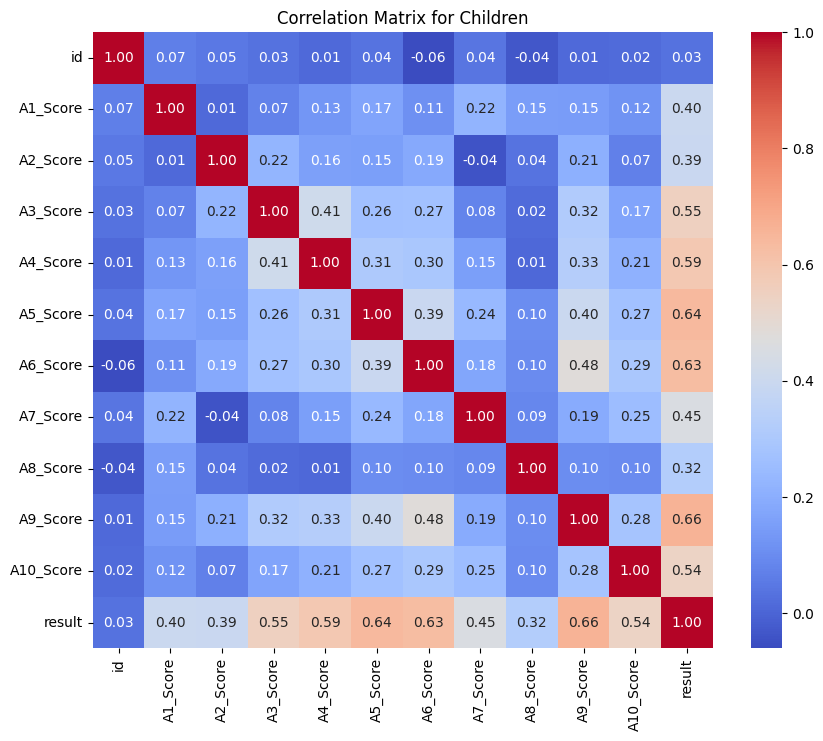

<ipython-input-12-59d599ab7734>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_adults = df_adults.corr()


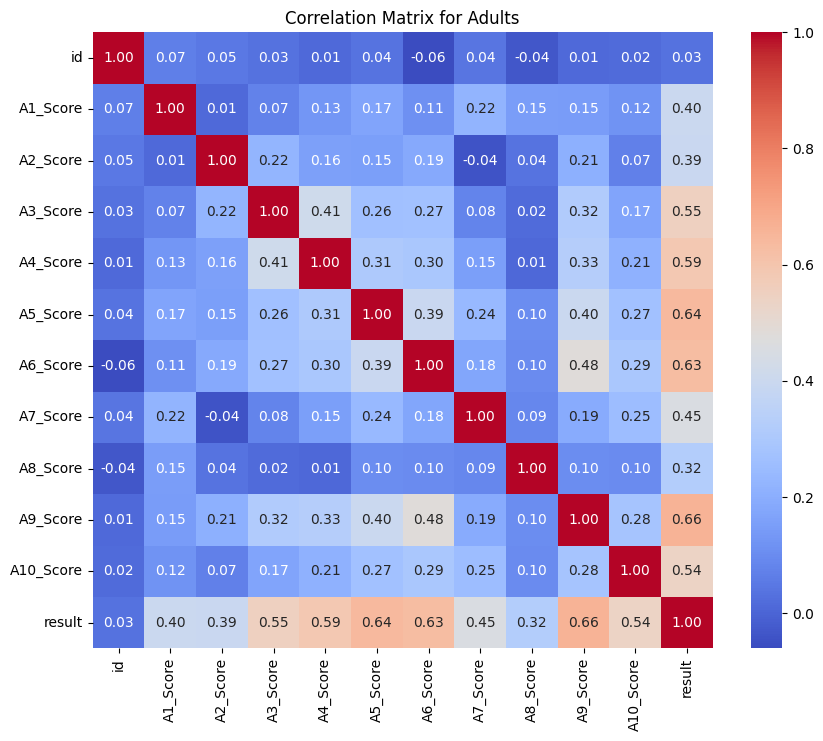

In [12]:
# Correlation Matrix for Children
correlation_matrix_children = df_children.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_children, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Children')
plt.show()

# Correlation Matrix for Adults (using the same variable as for children)
correlation_matrix_adults = df_adults.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_children, annot=True, cmap='coolwarm', fmt=".2f")  # using the same variable
plt.title('Correlation Matrix for Adults')
plt.show()


In [13]:
#Standardize Feature Names
df_adults.columns  = df_children.columns

In [14]:
# Merge Datasets
merged_data = pd.concat([df_adults, df_children], ignore_index=True)



4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Your answer for Hypothesis Testing goes here **
**The preexisting hypotheses about the data are as follows:**

- Hypothesis 1:There is a significant difference in the mean Qchat-10-Score between children and adults.
- Hypothesis 2: There is a significant correlation between age and Qchat-10-Score across all age groups.

***Methodologies***
- To test Hypothesis 1:
    - One methodology used here is One-way Analysis of Variance (ANOVA). ANOVA is a statistical method used to compare the means of three or more groups to determine if there are statistically significant differences between them.
    - Another methodology is Post-hoc Tests. If ANOVA indicates a significant difference, post-hoc tests such as Tukey's HSD or Bonferroni correction can be performed to identify which specific age groups differ significantly in mean Qchat-10-Score.
-To test Hypothesis 2:
    - The methodology used here is Scatter Plot. Visualizing the relationship between age and Qchat-10-Score through a scatter plot can provide insights into the nature of their association. If the plot shows a clear trend, it supports the hypothesis of a significant correlation.
    - Another methodology used is Pearson Correlation Coefficient. This method assesses the strength and direction of the linear relationship between age and Qchat-10-Score across all age groups. A correlation coefficient close to 1 or -1 suggests a strong positive or negative correlation, respectively, while a coefficient near 0 indicates no linear correlation.




  

 5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
  
  **Assess Data Density**:




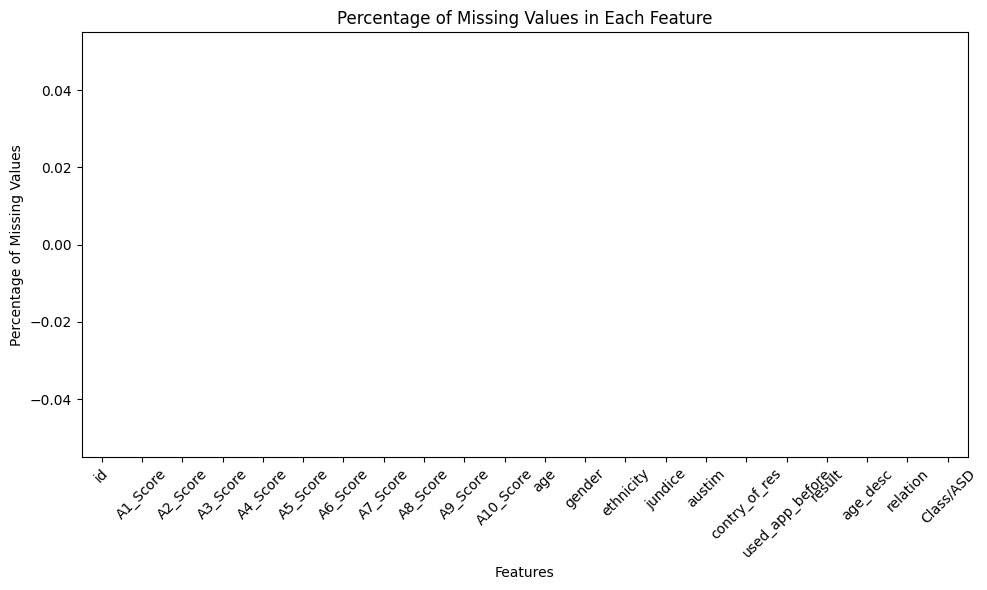

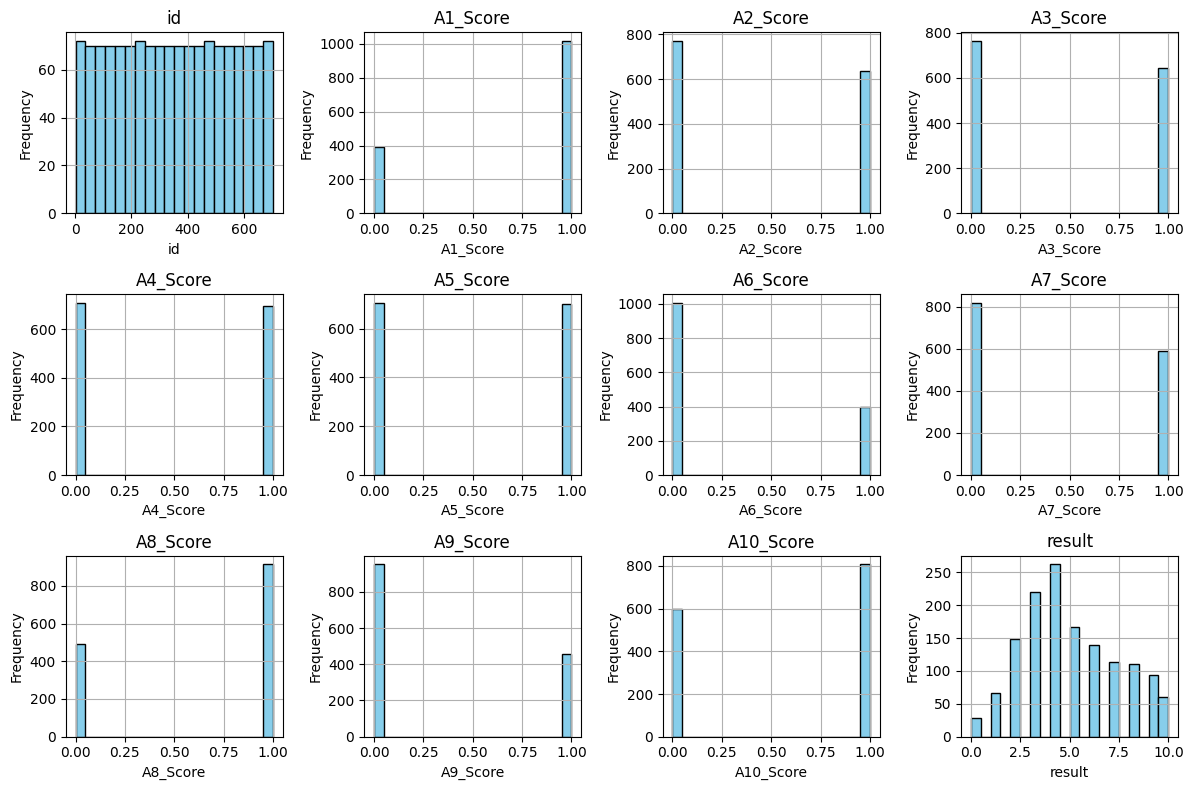

In [17]:
# Assessing data density

# Calculate percentage of missing values for each feature
missing_percentage = (merged_data.isnull().sum() / len(merged_data)) * 100

# Plot missing value percentages
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the distribution of numerical features
numerical_features = merged_data.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i+1)  # Adjusted to a 3x4 grid
    merged_data[feature].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



 - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

     **To handle missing data while maintaining dataset integrity:**
    1. Imputation Techniques: This is to replace missing values with statistical measures such as mean, median, or mode.
    2. Delete Rows or Columns: This is when missing values are extensive or cannot be imputed accurately, then will consider removing rows or columns with missing data.

    **To handle outliers while maintaining dataset integrity:**
    1. Winsorization: This is to cap extreme values by replacing them with a specified percentile value to mitigate their influence.
    2. Visualization: This is to use plot box plots, histograms, or scatter plots to visually identify outliers.

Insert code for Handling Sparse/Dense Data and Outliers below

In [29]:
# Handling Missing Data
# Impute missing values with mean
merged_data = merged_data.fillna(merged_data.mean())

# Handling Outliers
# Apply Winsorization to cap extreme values
merged_data_winsorized = pd.DataFrame()
for col in merged_data.columns:
    merged_data_winsorized[col] = winsorize(merged_data[col], limits=[0.05, 0.05])

# View processed data
print(merged_data_winsorized.head())

<ipython-input-29-8f66a9f71cd3>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data = merged_data.fillna(merged_data.mean())


   id  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0  36         1         1         1         1         0         0         1   
1  36         1         1         0         1         0         0         0   
2  36         1         1         0         1         1         0         1   
3  36         1         1         0         1         0         0         1   
4  36         1         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jundice austim  \
0         1         0  ...       f  White-European      no     no   
1         1         0  ...       m          Latino      no    yes   
2         1         1  ...       m          Latino     yes    yes   
3         1         0  ...       f  White-European      no    yes   
4         1         0  ...       f               ?      no     no   

   contry_of_res used_app_before result     age_desc  relation Class/ASD  
0  United States              no   

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.
   
- Randomization: Shuffle the entire dataset to ensure randomness and prevent biases in the data order.
- Stratified Splitting: If the dataset is imbalanced, perform stratified splitting to maintain similar class distributions across subsets.
- Percentage Split: Allocate percentages for training, validation, and testing sets, such as 70%, 15%, and 15%, respectively.
- Splitting Process: Initially divide the dataset into a combined training-validation set and a testing set, then further split the training-validation set into training and validation subsets.
- Implementation: Utilize libraries like scikit-learn or TensorFlow/Keras for the splitting process, ensuring to set a random seed for reproducibility if required.




7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
  
- Techniques for identifying and and mitigating biases in the dataset:


1. Stratified Sampling: Ensure that each subset (training, validation, testing) maintains the same distribution of sensitive attributes (e.g., race, gender) as the original dataset.

2. Bias Analysis: Before splitting, conduct bias analysis using metrics like disparate impact or statistical parity difference to identify biases in the dataset.

3. Fairness-Aware Splitting: Implement fairness-aware splitting techniques that adjust the sampling process to minimize disparities in each subset.

4. Randomization: Shuffle the dataset before splitting to prevent any inherent ordering or biases.

5. Representativeness Check: After splitting, verify that each subset accurately represents the diversity present in the original dataset, particularly in terms of sensitive attributes.

In [30]:
# Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_data_winsorized[ ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                      'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']] = scaler.fit_transform(merged_data_winsorized[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                      'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']])

In [31]:
# Merge Datasets
merged_data_winsorized = pd.concat([df_adults, df_children],  axis=0)

# Split combined dataset into features (X) and target variable (y)
X =merged_data_winsorized.drop(columns=['Class/ASD'])
y = merged_data_winsorized['Class/ASD']

# Perform randomization
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Further split training-validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42)

In [32]:
# Verify the shapes of the subsets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (985, 21) (985,)
Validation set shape: (211, 21) (211,)
Testing set shape: (212, 21) (212,)


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **


Analyzing Each Column

Ethnicity

In [34]:
merged_data_winsorized.groupby('ethnicity').size()

ethnicity
?                  190
Asian              246
Black               86
Hispanic            26
Latino              40
Middle Eastern     184
Others              60
Pasifika            24
South Asian         72
Turkish             12
White-European     466
others               2
dtype: int64

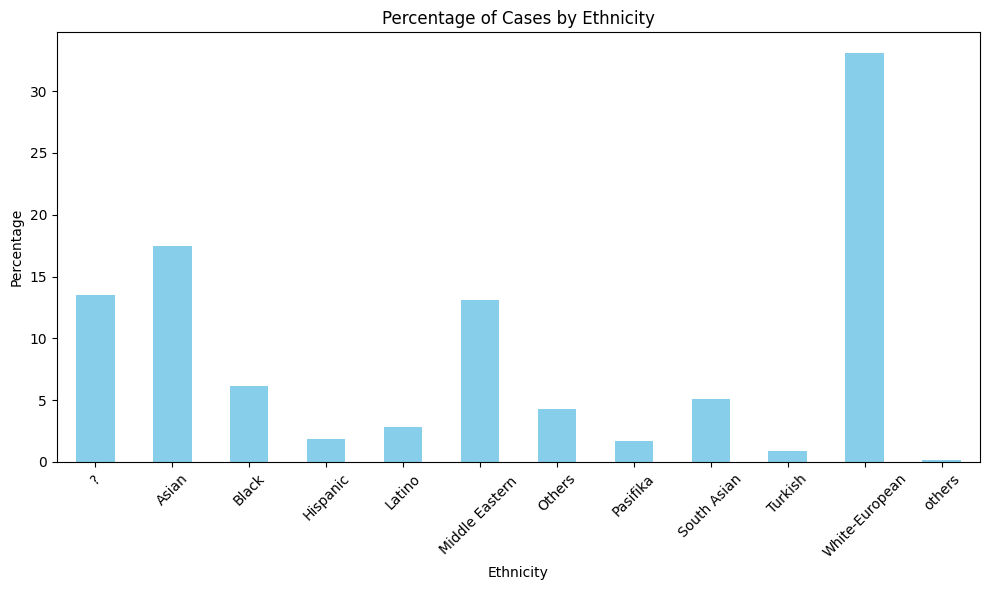

In [39]:
# Group the data by ethnicity and calculate the size of each group
ethnicity_counts = merged_data_winsorized.groupby('ethnicity').size()

# Calculate the total number of cases
total_cases = ethnicity_counts.sum()

# Calculate the percentage of cases for each ethnicity
ethnicity_percentages = (ethnicity_counts / total_cases) * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
ethnicity_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Cases by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion : White Europeans have most cases of ASD around the world followed by asians.

Gender

In [43]:
merged_data_winsorized.groupby('gender').size()

gender
f    674
m    734
dtype: int64

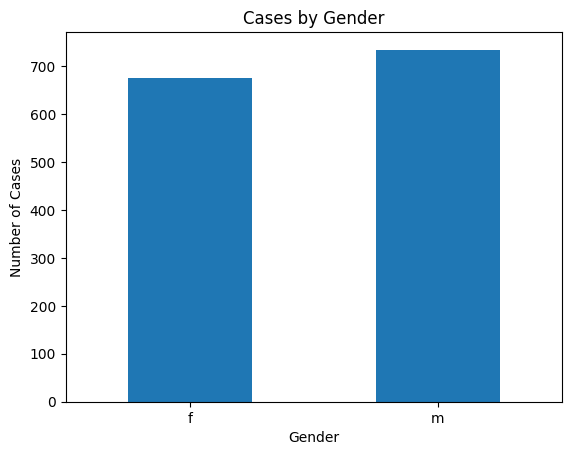

In [58]:
# Plotting the number of cases by gender
merged_data_winsorized.groupby('gender').size().plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.title('Cases by Gender')
plt.xticks(rotation=360)

plt.show()


Conclusion : Males are more prone to ASD in comparision to Females

Jaundice

In [62]:
merged_data_winsorized.groupby('jundice').size()

jundice
no     1270
yes     138
dtype: int64

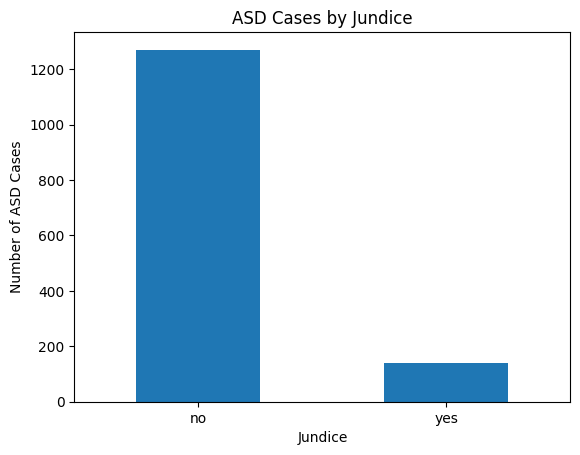

In [68]:
# Plotting the number of cases by jundice
merged_data_winsorized.groupby('jundice').size().plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel('Jundice')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Jundice')
plt.xticks(rotation=360)

plt.show()


Conclusion : Having jundice does not determine whether you have autism.

Relation

In [69]:
merged_data_winsorized.groupby("relation").size()

relation
?                            190
Health care professional       8
Others                        10
Parent                       100
Relative                      56
Self                        1044
dtype: int64

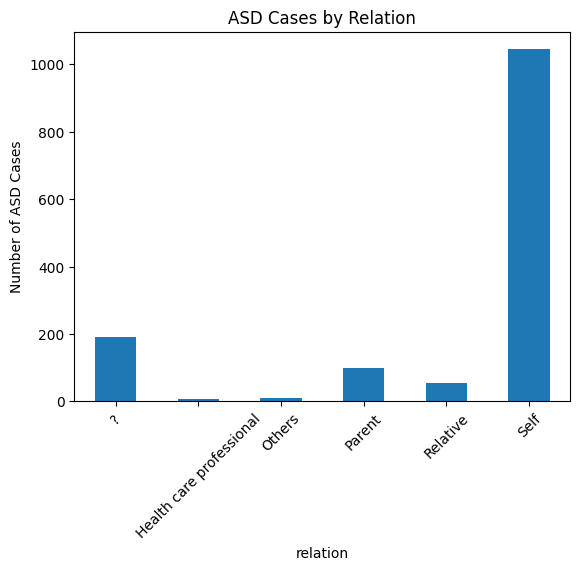

In [73]:
# Plotting the number of cases by relation
merged_data_winsorized.groupby('relation').size().plot(kind='bar')
plt.xlabel('Relation')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Relation')
plt.xticks()
plt.xticks(rotation=45)

plt.show()

Conclusion : Most ASD cases around the world do not have their family members with ASD that means ASD is not a genetic disease.

Age

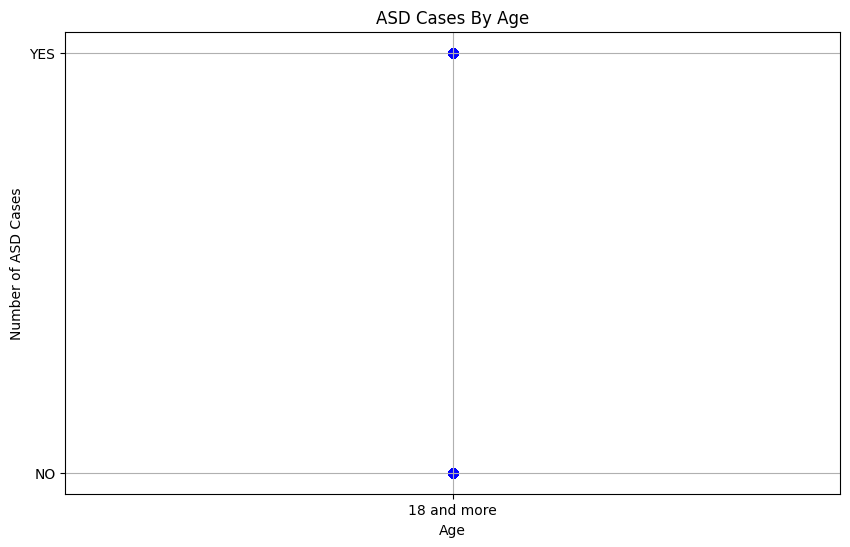

In [88]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(merged_data_winsorized['age_desc'], merged_data_winsorized['Class/ASD'], color='blue', alpha=0.5)
plt.title('ASD Cases By Age')
plt.xlabel('Age')
plt.ylabel('Number of ASD Cases')
plt.grid(True)
plt.show()

Qchat-10-Score

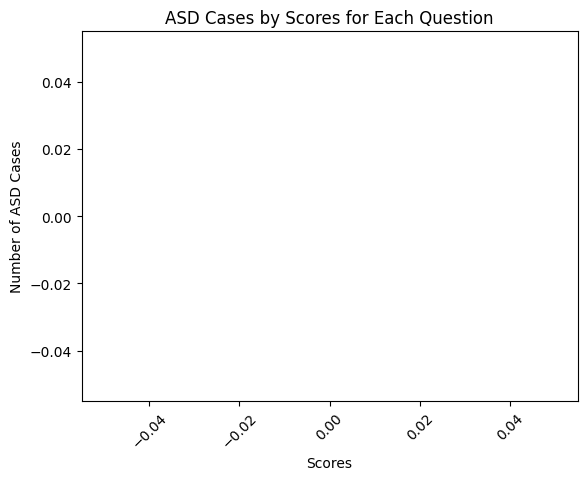


9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

**Types of Data:**
1. **Numerical:**
   - A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score_Score, age

2. **Categorical:**
   - gender, ethnicity, jundice, austim, contry_of_res, used_app_before, result, age_desc, relation, Class/ASD

**Preprocessing Steps:**

1. **Handling Missing Data:**
   - Identify missing values represented by '?' in the dataset.
   - Replace missing values with appropriate imputation techniques (e.g., mode for categorical features, mean or median for numerical features).

2. **Encoding Categorical Variables:**
   - Perform one-hot encoding for categorical variables to convert them into binary vectors, creating separate binary columns for each category.

3. **Normalization and Scaling:**
   - Normalize numerical features like age using techniques such as Min-Max scaling or Z-score normalization to ensure they are on a similar scale and reduce the impact of outliers.

4. **Outlier Detection and Treatment:**
   - Identify outliers in numerical features using statistical methods like Z-score or visualization techniques like box plots.
   - Apply outlier treatment methods such as trimming or winsorization to mitigate the influence of outliers on the analysis.

5. **Data Validation:**
   - Validate the preprocessed dataset to ensure that all missing values are handled, categorical variables are properly encoded, and numerical features are normalized.



In [89]:
#print out relevant features
relevant_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                     'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
                     'age', 'gender', 'ethnicity', 'jundice', 'austim',
                     'contry_of_res', 'used_app_before', 'result', 'age_desc',
                     'relation', 'Class/ASD']

relevant_data = merged_data_winsorized[relevant_features]
print(relevant_data.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ... gender       ethnicity jundice austim  \
0         1         0          0  ...      f  White-European      no     no   
1         1         0          1  ...      m          Latino      no    yes   
2         1         1          1  ...      m          Latino     yes    yes   
3         1         0          1  ...      f  White-European      no    yes   
4         1         0          0  ...      f               ?      no     no   

   contry_of_res used_app_before result     age_desc relation Class/ASD  



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.




In [95]:
# Step 1: Identify columns with non-numeric values
non_numeric_columns = merged_data_winsorized.select_dtypes(exclude=['float64', 'int64']).columns

# Step 2: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
merged_data_winsorized[non_numeric_columns] = imputer.fit_transform(merged_data_winsorized[non_numeric_columns])

# Step 3: Normalize numerical features
scaler = StandardScaler()
merged_data_winsorized[numerical_features] = scaler.fit_transform(merged_data_winsorized[numerical_features])

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '?'

In [91]:
#Normalization for Numerical Features:

# Define numerical features
numerical_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                      'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical features
merged_data_winsorized[numerical_features] = scaler.fit_transform(merged_data_winsorized[numerical_features])

ValueError: could not convert string to float: '?'

In [ ]:
#Scaling for Numerical Features:

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
merged_data_winsorized[numerical_features] = scaler.fit_transform(merged_data_winsorized[numerical_features])

In [ ]:
#Encoding Categorical Variables:

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(merged_data_winsorized, columns=['gender', 'ethnicity', 'jundice',
                                             'austim', 'contry_of_res',
                                             'used_app_before', 'age_desc',
                                             'relation', 'Class/ASD'])



11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.



In [90]:
# Define the file path
file_path = 'autism_detect.csv'

# Save DataFrame to a CSV file
merged_data_winsorized.to_csv(file_path, index=False)

print("Processed data has been stored in:", file_path)

Processed data has been stored in: autism_detect.csv


---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.